<a href="https://colab.research.google.com/github/kiiran7781/LGMVIP-DataScience-Kiran-K/blob/main/Beginner%20level%20tasks%20/Task-3%20Stock_market_predicton_and_forecasting_using_stacked_LSTM/Stock_market_predicton_and_forecasting_using_stacked_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Science Intern at Let's Grow More LGMVIP -Aug**

## **Beginner Level Task**

## **Stock market predicton and forecasting using stacked LSTM**

## **K Kiran**

In [110]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [111]:
import pandas as pd
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
data = pd.read_csv(url)
data


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [113]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [114]:
data.shape

(2035, 8)

In [115]:
data.nunique()

Date                    2035
Open                    1165
High                    1257
Low                     1263
Last                    1268
Close                   1313
Total Trade Quantity    2034
Turnover (Lacs)         2030
dtype: int64

In [116]:
data.duplicated().sum()

0

<ipython-input-117-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

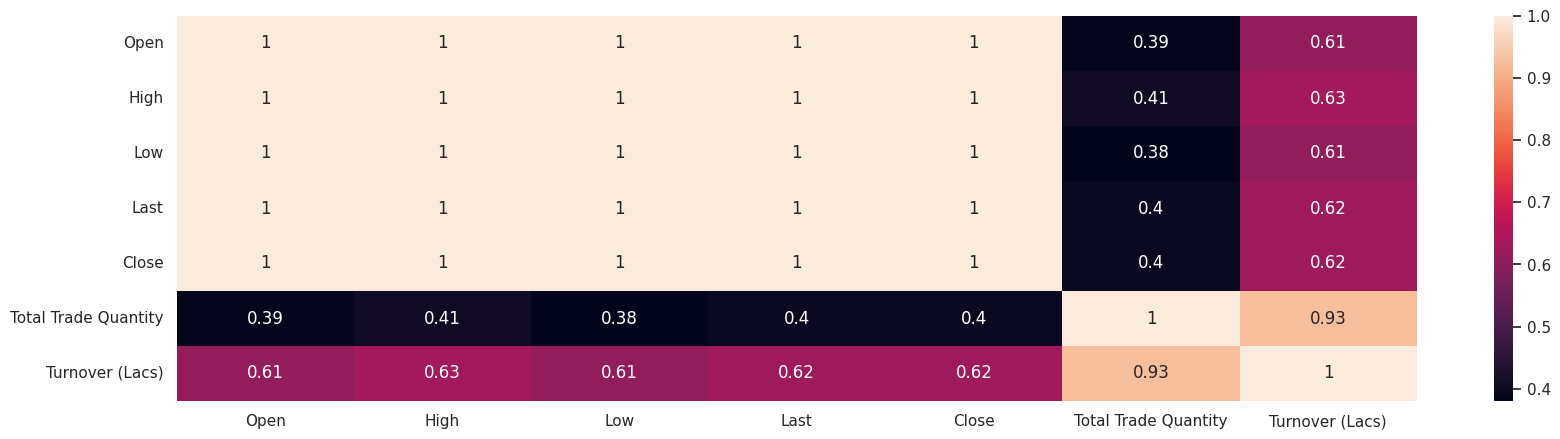

In [117]:
sns.heatmap(data.corr(),annot=True)

In [118]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

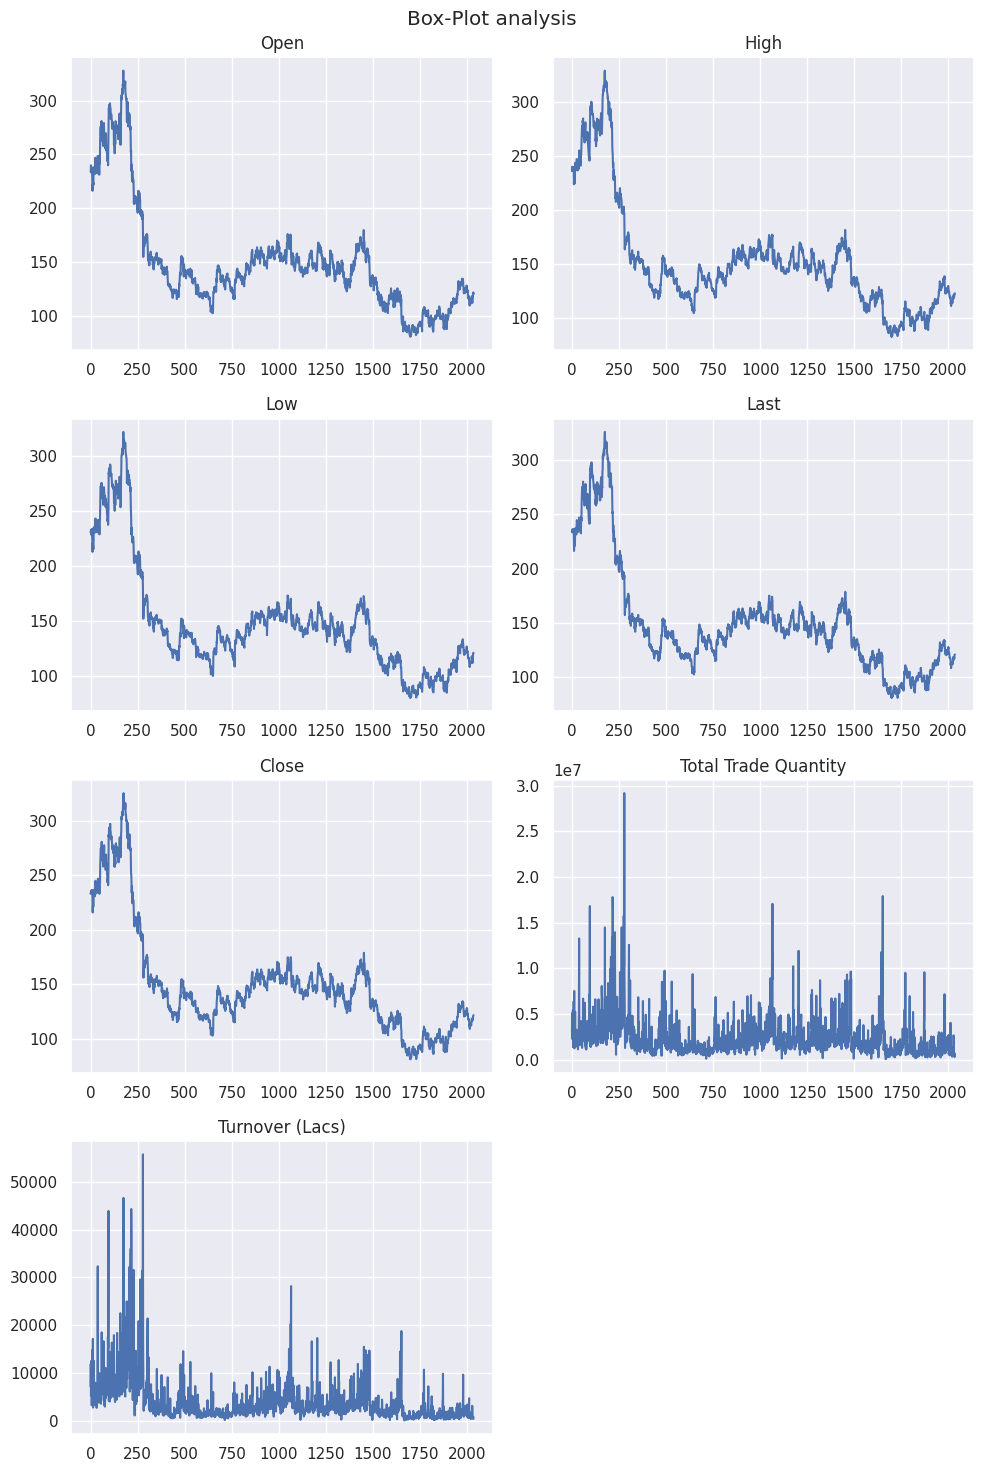

In [119]:
plt.figure(figsize=(10,15))
plt.suptitle("Box-Plot analysis")
for i in range(1,len(data.columns)):
  plt.subplot(4,2,i)
  plt.plot(data[data.columns[i]],data=data)
  plt.title(data.columns[i])
plt.tight_layout()
plt.show()

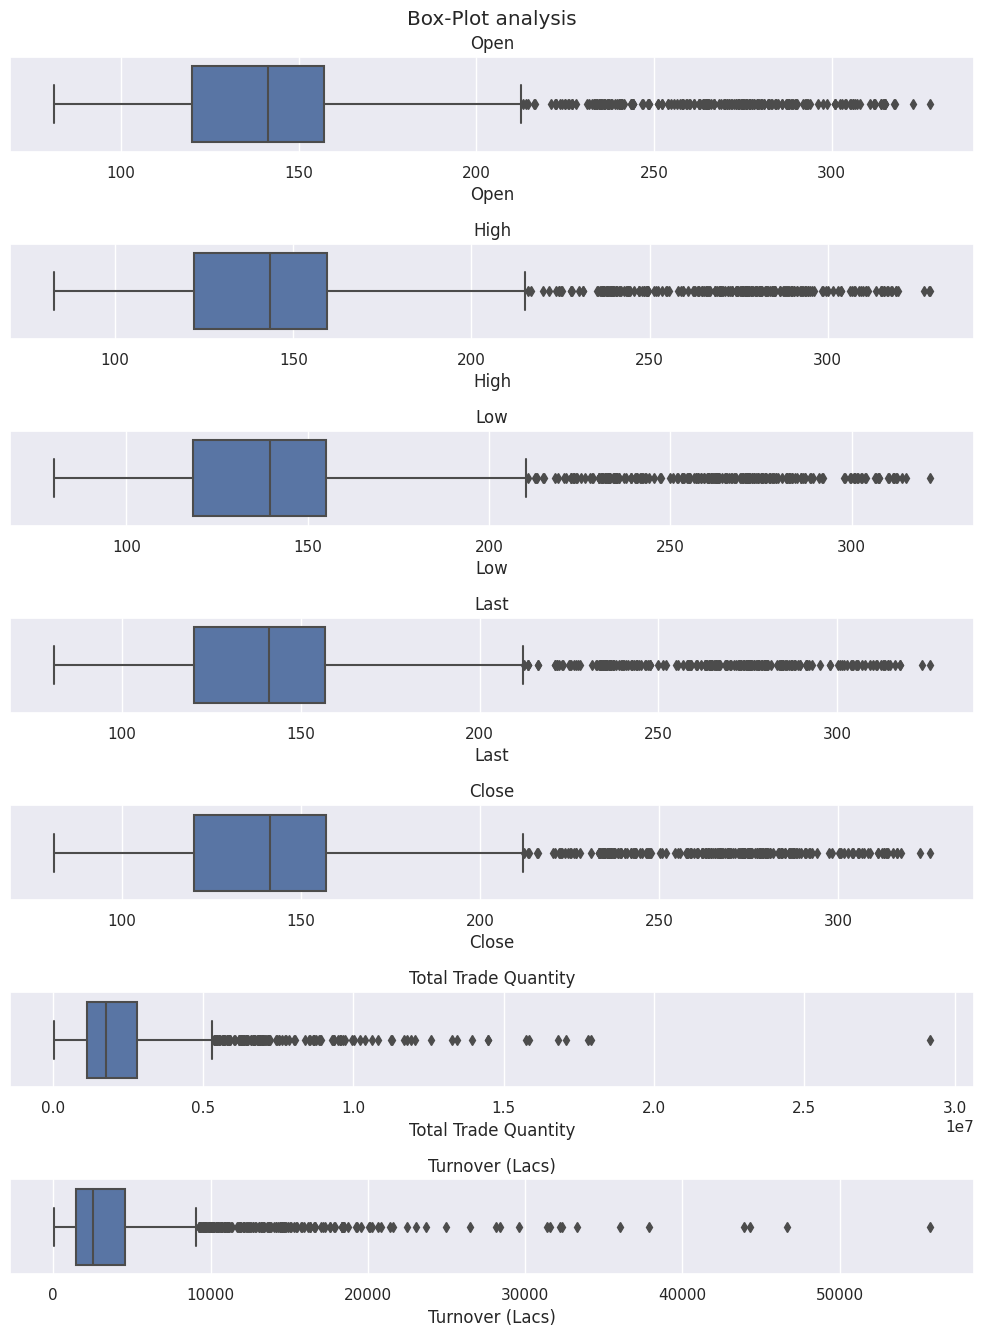

In [120]:
plt.figure(figsize=(10,15))
plt.suptitle("Box-Plot analysis")
for i in range(1,len(data.columns)):
  plt.subplot(8,1,i)
  sns.boxplot(x=data[data.columns[i]],data=data)
  plt.title(data.columns[i])
  print("\n\n")
plt.tight_layout()
plt.show()


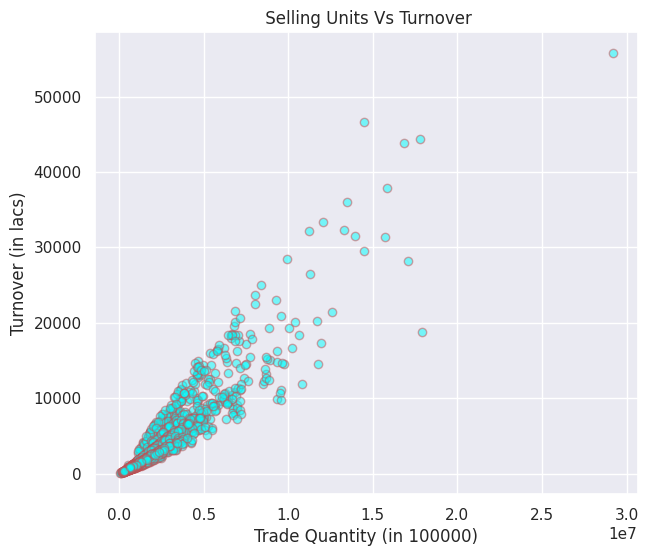

In [122]:
fig=plt.figure(figsize=(7,6))
plt.scatter(data['Total Trade Quantity'],data['Turnover (Lacs)'], alpha=0.5, edgecolor='r', color='cyan')
plt.xlabel("Trade Quantity (in 100000)")
plt.ylabel("Turnover (in lacs)")
plt.title(" Selling Units Vs Turnover")
plt.show()

<ipython-input-123-4915c7f0e741>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data[data.columns[i]])
<ipython-input-123-4915c7f0e741>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=data[data.columns[i]])
<ipython-input-123-4915c7f0e741>:5: UserWarning: 

`distplot` is a deprecated func

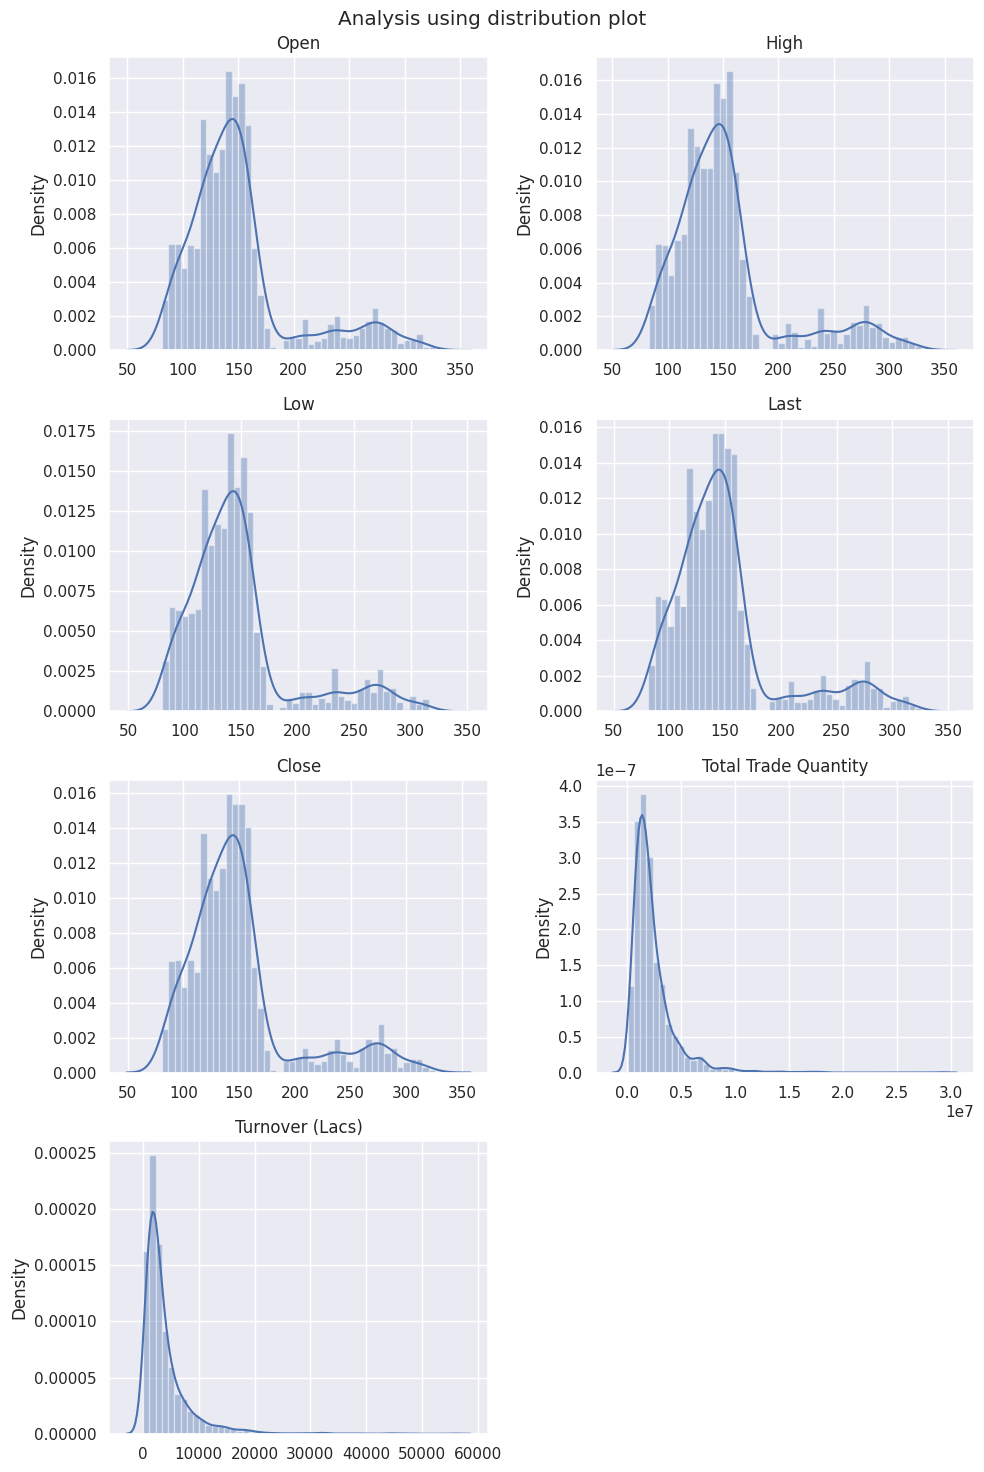

In [123]:
plt.figure(figsize=(10,15))
plt.suptitle("Analysis using distribution plot")
for i in range(1,len(data.columns)):
  plt.subplot(4,2,i)
  sns.distplot(x=data[data.columns[i]])
  plt.title(data.columns[i])
plt.tight_layout()
plt.show()


In [124]:
import math
data_set = data.filter(['Close'])
dataset = data.values
training_data_len=math.ceil(len(data) * 8)
training_data_len


16280

In [125]:
dataset

array([['2018-09-28', 234.05, 235.95, ..., 233.75, 3069914, 7162.35],
       ['2018-09-27', 234.55, 236.8, ..., 233.25, 5082859, 11859.95],
       ['2018-09-26', 240.0, 240.0, ..., 234.25, 2240909, 5248.6],
       ...,
       ['2010-07-23', 121.8, 121.95, ..., 120.65, 281312, 340.31],
       ['2010-07-22', 120.3, 122.0, ..., 120.9, 293312, 355.17],
       ['2010-07-21', 122.1, 123.0, ..., 121.55, 658666, 803.56]],
      dtype=object)

In [126]:

data = data.iloc[:, 0:5]
data

,Date,Open,High,Low,Last
0,2018-09-28,234.05,235.95,230.20,233.50
1,2018-09-27,234.55,236.80,231.10,233.80
2,2018-09-26,240.00,240.00,232.50,235.00
3,2018-09-25,233.30,236.75,232.00,236.25
4,2018-09-24,233.55,239.20,230.75,234.00
...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80
2031,2010-07-26,120.10,121.00,117.10,117.10
2032,2010-07-23,121.80,121.95,120.25,120.35
2033,2010-07-22,120.30,122.00,120.25,120.75


In [127]:

training_set = data.iloc[:, 1:2].values
training_set


array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [ ]:
#Dataset scaling

In [128]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
data_training_scaled = scaler.fit_transform(training_set)

In [129]:
features_set = []
labels = []
for i in range(60, 586):
  features_set.append(data_training_scaled[i - 60:i, 0])
  labels.append(data_training_scaled[i, 0])

In [130]:
features_set, labels = np.array(features_set), np.array(labels)


In [131]:
features_set = np.reshape(features_set, (features_set.shape[0], features_set.shape[1], 1))
features_set.shape

(526, 60, 1)

#Building The LSTM

In [132]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM


In [133]:
model = Sequential()


In [134]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(features_set, labels, epochs=50, batch_size=20)


Epoch 1/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 2/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 3/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 4/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 5/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 6/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 7/50
27/27 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 8/50
27/27 [==============================] - 0s 923us/step - loss: 0.0118
Epoch 9/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 10/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 11/50
27/27 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 12/50
27/27 [==============================] - 0s 985us/step - loss: 0.0118
Epoch 13/50
27/27 [==========================

In [135]:
data_testing_complete = pd.read_csv(url)
data_testing_processed = data_testing_complete.iloc[:, 1:2]
data_testing_processed



,Open
0,234.05
1,234.55
2,240.00
3,233.30
4,233.55
...,...
2030,117.60
2031,120.10
2032,121.80
2033,120.30


#Prediction

In [136]:
data_total = pd.concat((data['Open'], data['Open']), axis=0)


In [137]:
test_inputs = data_total[len(data_total) - len(data) - 60:].values
test_inputs.shape

(2095,)

In [138]:
test_inputs = test_inputs.reshape(-1, 1)
test_inputs = scaler.transform(test_inputs)

In [139]:
test_feature = []
for i in range(60, 89):
  test_feature.append(test_inputs[i-60:i, 0])

In [140]:
test_feature = np.array(test_feature)
test_feature = np.reshape(test_feature, (test_feature.shape[0] - test_feature.shape[1], 1))
test_feature.shape

(1740, 1)

In [141]:
predictions = model.predict(test_feature)


In [142]:
predictions

array([[0.20600162],
       [0.21654502],
       [0.21654502],
       ...,
       [0.67234385],
       [0.6605839 ],
       [0.64760745]], dtype=float32)

In [143]:
x_train = data[0:1256]
y_train = data[1:1257]
print(x_train.shape)
print(y_train.shape)

(1256, 5)
(1256, 5)


In [144]:
np.random.seed(1)
np.random.randn(3, 3)

array([[ 1.62434536, -0.61175641, -0.52817175],
       [-1.07296862,  0.86540763, -2.3015387 ],
       [ 1.74481176, -0.7612069 ,  0.3190391 ]])

**Drawing a Single number from the Normal Distribution**

In [145]:
np.random.normal(1)


0.7506296245225899

**Drawing 5 numbers from Normal Distribution**


In [146]:
np.random.normal(5)


6.4621079370449745

In [147]:
np.random.seed(42)


In [148]:
np.random.normal(size=1000, scale=100).std()


97.87262077473541

#**Ploting Results**

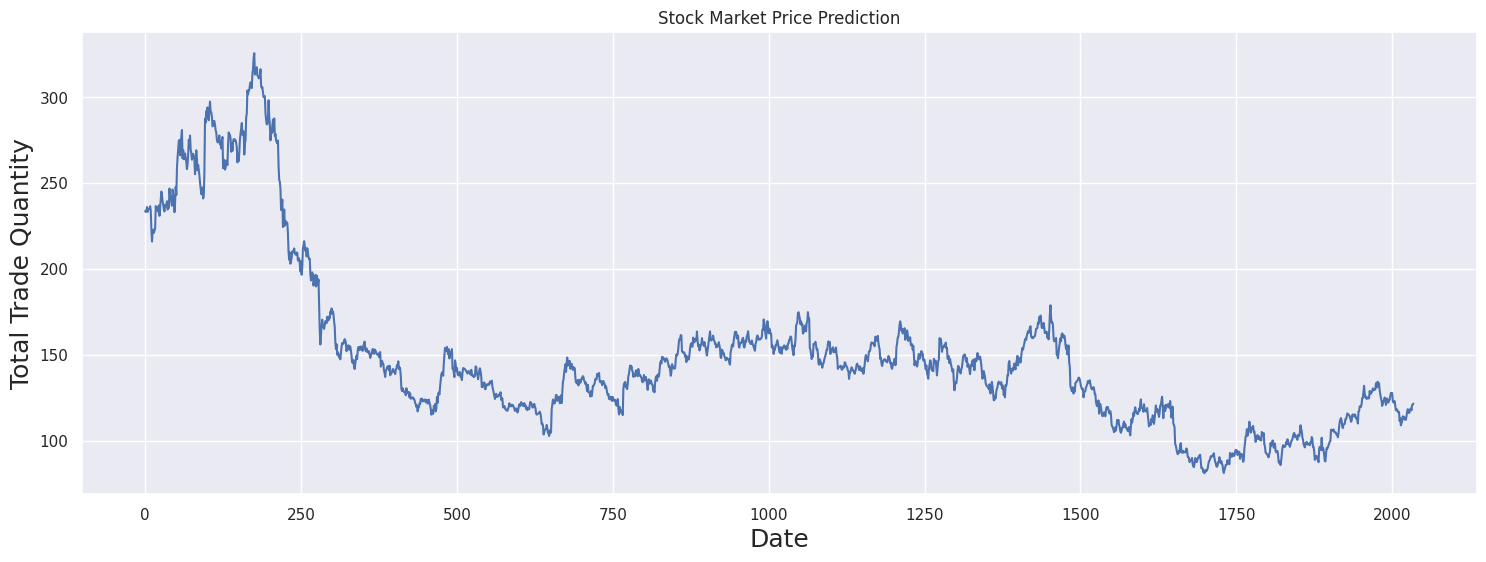

In [149]:
plt.figure(figsize=(18,6))
plt.title("Stock Market Price Prediction")
plt.plot(data_testing_complete['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Total Trade Quantity', fontsize=18)
plt.show()

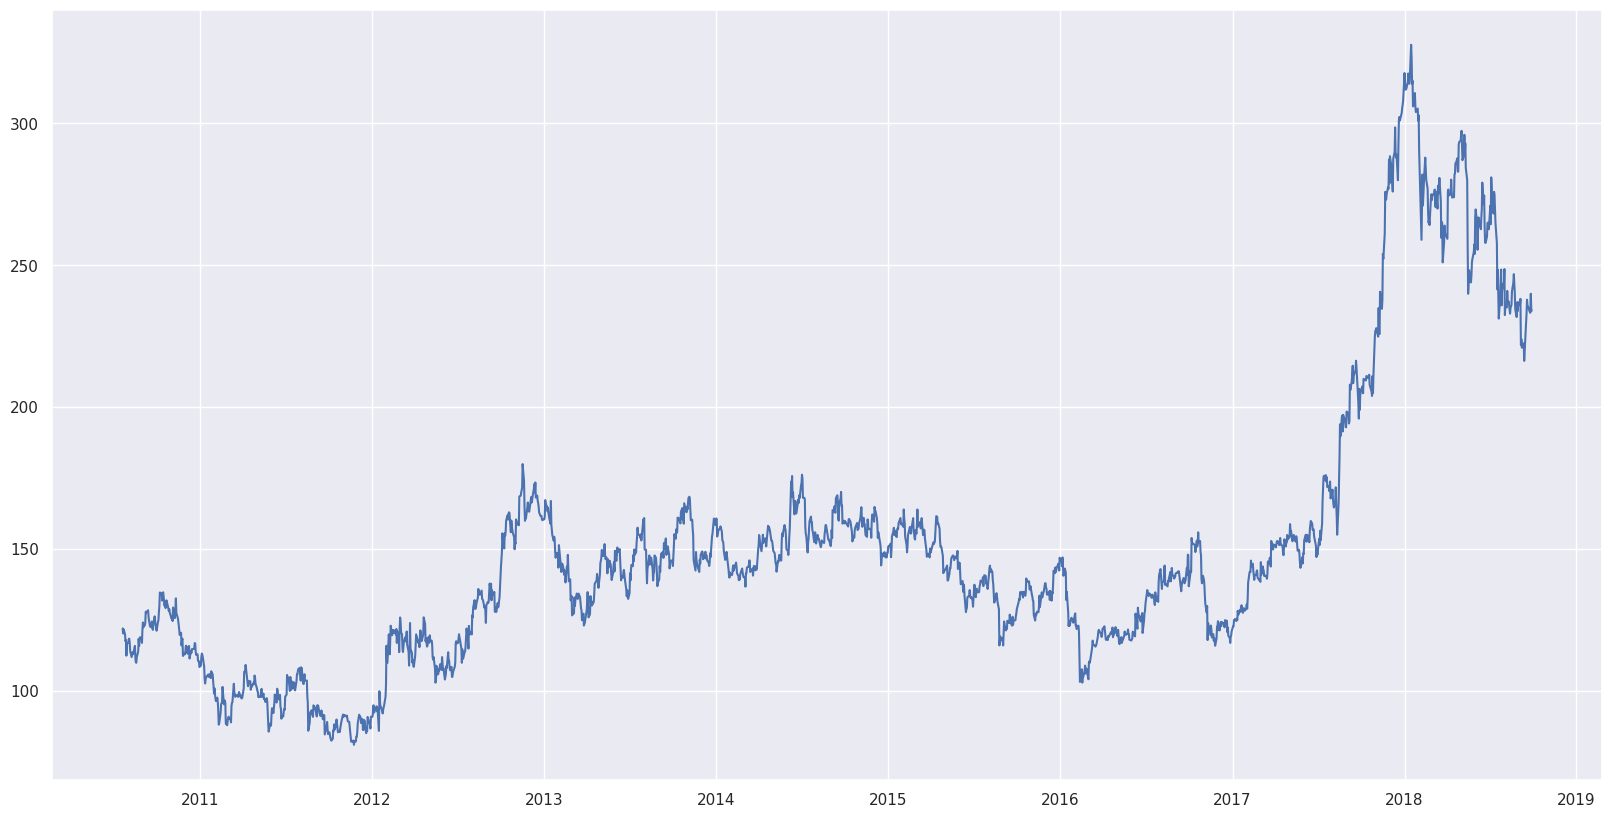

In [150]:
data["Date"] = pd.to_datetime(data.Date)
data.index = data['Date']

plt.figure(figsize=(20, 10))
plt.plot(data["Open"], label='ClosePriceHist')

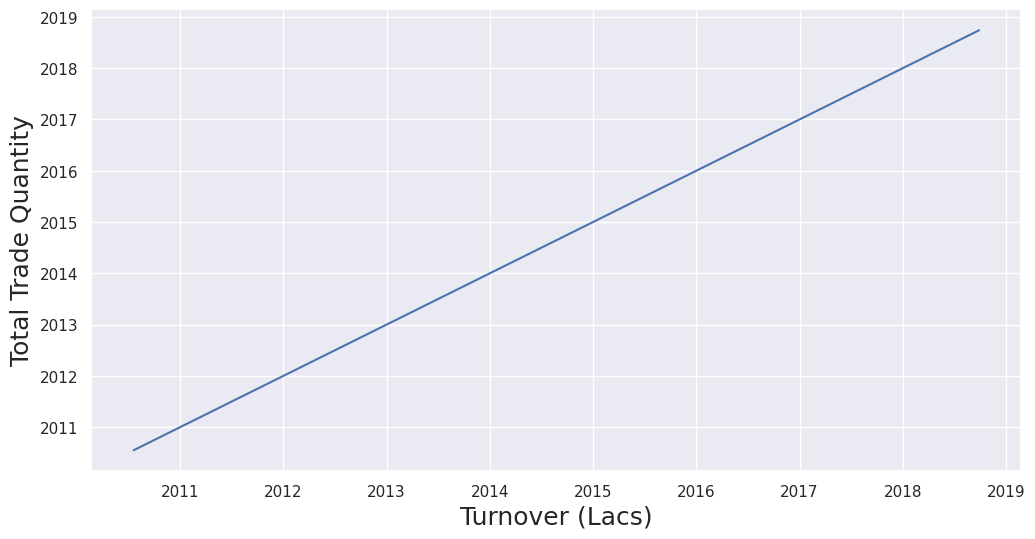

In [151]:
plt.figure(figsize=(12,6))
plt.plot(data['Date'])
plt.xlabel('Turnover (Lacs)', fontsize=18)
plt.ylabel('Total Trade Quantity', fontsize=18)
plt.show()

<Axes: xlabel='Date'>

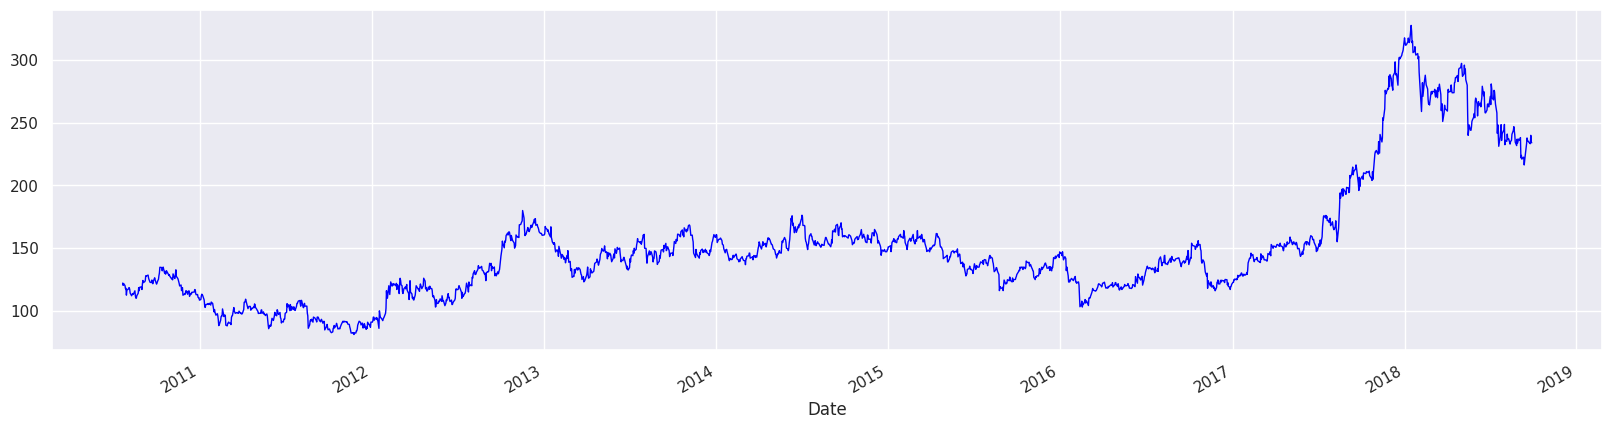

In [152]:
sns.set(rc = {'figure.figsize': (20, 5)})
data['Open'].plot(linewidth = 1,color='blue')


In [153]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Last'], dtype='object')

In [154]:
df=pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [155]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Last', 'Close', 'Total Trade Quantity',
       'Turnover (Lacs)'],
      dtype='object')

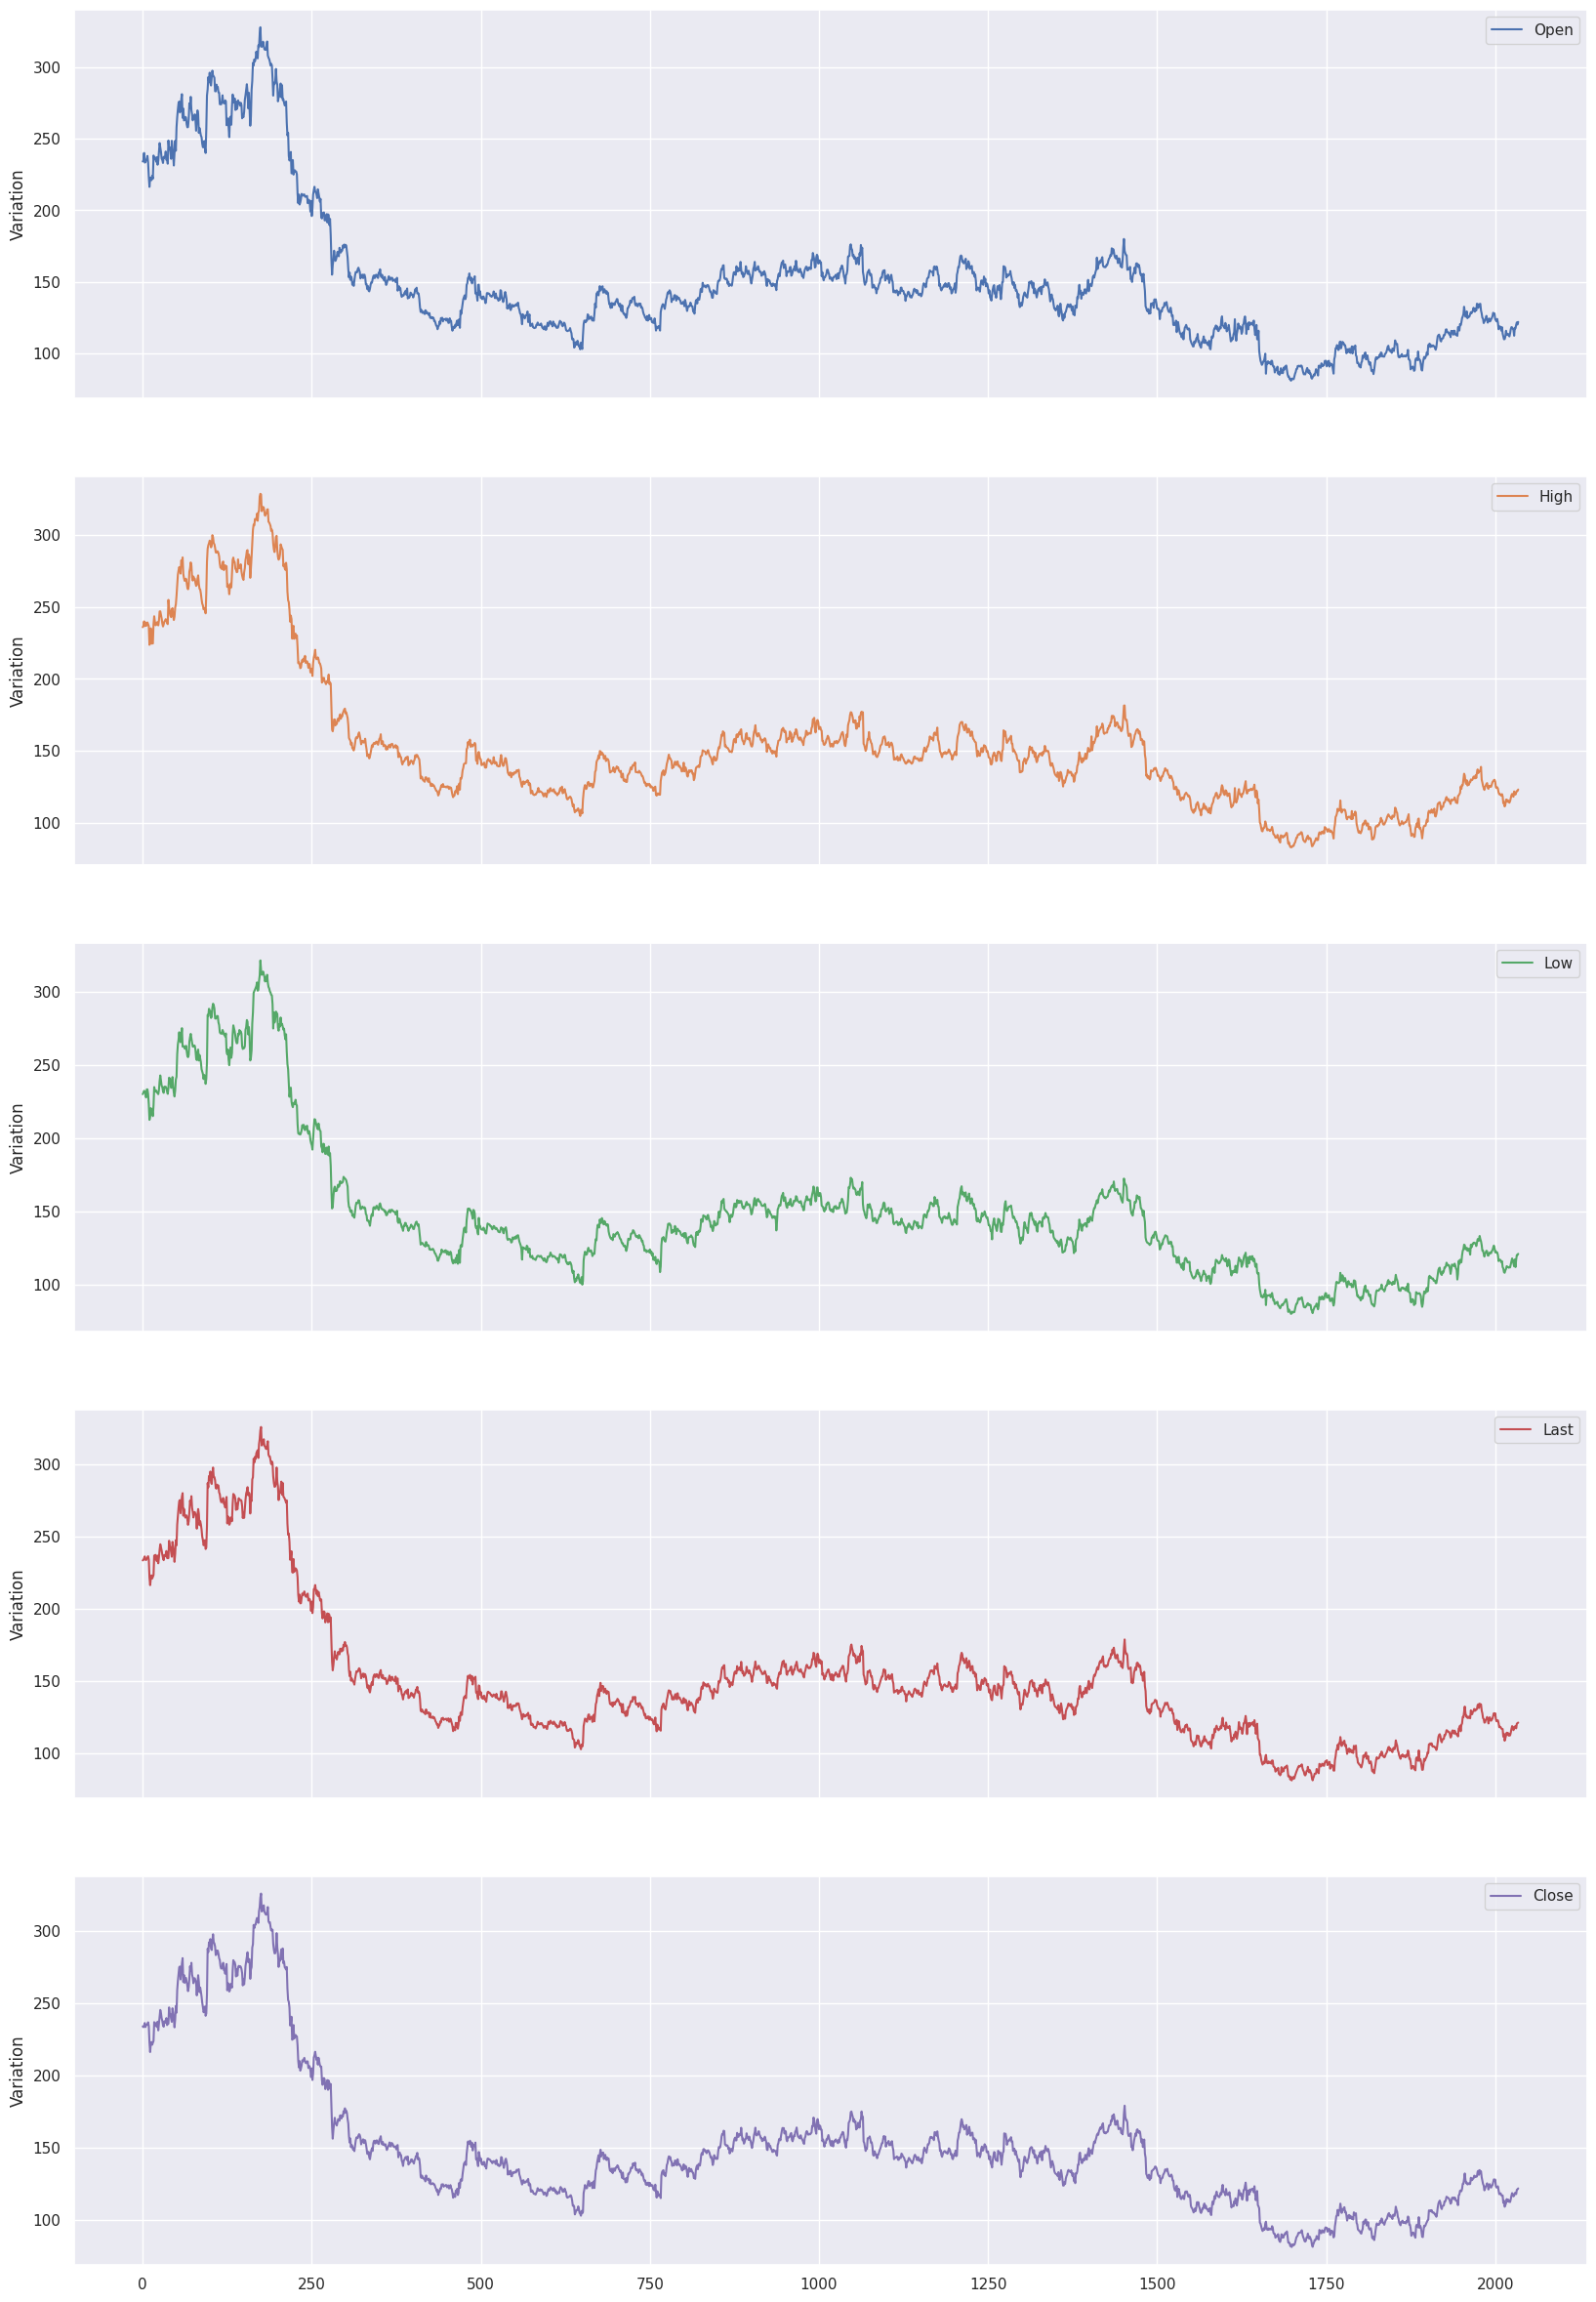

In [156]:
col_plot = ['Open','High','Low','Last','Close']
axes = df[col_plot].plot(alpha = 1, figsize=(20, 30), subplots = True)

for ax in axes:
    ax.set_ylabel('Variation')